<a href="https://colab.research.google.com/github/palak0626/predictive-analysis/blob/main/assignment1(pdf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataset

In [ ]:
data = pd.read_csv("/content/data.csv" , encoding = "latin1")

/tmp/ipython-input-3265962924.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/data.csv" , encoding = "latin1")


In [ ]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# data cleaning

In [ ]:
no2 = data["no2"]
no2 = no2.dropna()
n02 = no2[no2>=0]
no2 = pd.to_numeric(no2 , errors = 'coerce')
no2 = no2.dropna()
no2 = no2[no2 < np.percentile(no2, 99)]
x = no2.reset_index(drop = True)
#x = np.log1p(no2.values)
len(x)

415310

# compute values

In [ ]:
r = 102303826

In [ ]:
a_r = 0.05 * (r%7)
b_r = 0.3 * ((r% 5) +1)

In [ ]:
a_r

0.1

In [ ]:
b_r

0.6

In [ ]:
z = x + a_r * np.sin(b_r *x)

In [ ]:
z

,no2
0,17.315040
1,6.912842
2,28.401593
3,14.756858
4,7.402247
...,...
415305,44.095429
415306,44.095429
415307,45.095638
415308,49.901197


In [ ]:
mu = np.mean(z)
mu

np.float64(24.821444190873866)

In [ ]:
variance = np.mean((z-mu) ** 2)
lam = 1/(2*variance)

In [ ]:
variance

np.float64(228.81631554695954)

In [ ]:
lam

np.float64(0.0021851588633651693)

In [ ]:
c = np.sqrt(lam/np.pi)
c

np.float64(0.026373427329250715)

In [ ]:
def pdf(z,lam,mu,c):
  return c*np.exp(-lam * (z - mu) ** 2)

# plotting

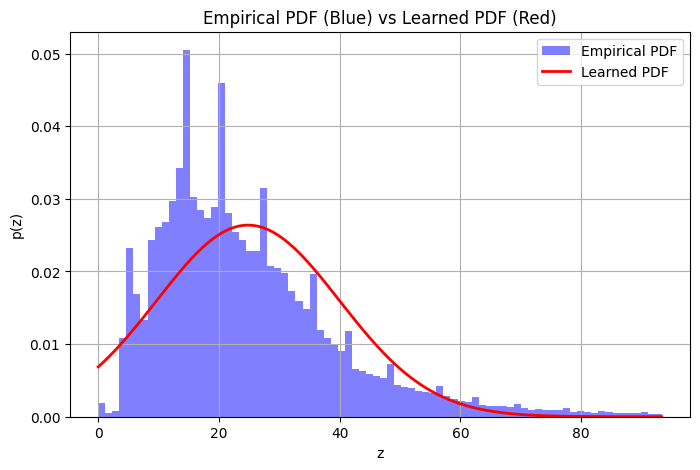

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(z, bins=80, density=True, alpha=0.5, color='blue', label="Empirical PDF")


z_sorted = np.sort(z)
p_z = c * np.exp(-lam * (z_sorted - mu)**2)

plt.plot(z_sorted, p_z, color='red', linewidth=2.0, label="Learned PDF")

plt.xlabel("z")
plt.ylabel("p(z)")
plt.title("Empirical PDF (Blue) vs Learned PDF (Red)")
plt.legend()
plt.grid(True)
plt.show()

